Ketua: 20-114 Irham Hamed Ayani

Anggota: 20-041 Chendy Tri Wardani

link github: https://github.com/HamedAyani114/kelompokpro

In [220]:
import numpy as np
import pandas as pd

In [221]:
df_data = pd.read_csv('GGRM.JK_monthly.csv')
df_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
260,2023-03-01,25000.0,27100.0,23125.0,26000.0,26000.0,39882600
261,2023-04-01,26000.0,29350.0,23800.0,28450.0,28450.0,30263400
262,2023-05-01,28475.0,30050.0,27000.0,27000.0,27000.0,53852800
263,2023-06-01,27250.0,28900.0,27225.0,28000.0,28000.0,15604700
264,2023-06-14,0.0,0.0,0.0,27600.0,27600.0,0


In [222]:
df_open= df_data['Open']

df_open = df_open[df_open!=0]

<AxesSubplot: xlabel='Date'>

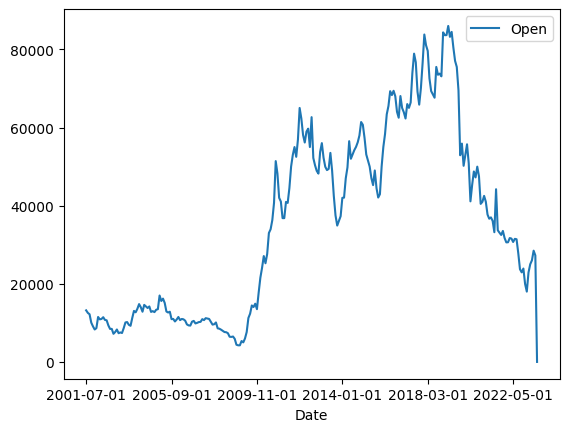

In [223]:
import matplotlib.pyplot as plt

#path = #enter the path of your csv file

df_data.plot(x='Date', y='Open')

In [224]:
X = df_data.iloc[:, 0:2]



In [225]:
# transform univariate time series to supervised learning problem
from numpy import array
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
    # find the end of this pattern
        end_ix = i + n_steps
    # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
    # gather input and output parts of the pattern
        # print(i, end_ix)
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [226]:
n_steps = 4
X, y = split_sequence(df_open, n_steps)

In [227]:
# column names to X and y data frames
df_X = pd.DataFrame(X, columns=['t-'+str(i) for i in range(n_steps-1, -1,-1)])
df_y = pd.DataFrame(y, columns=['t+1 (prediction)'])

# concat df_X and df_y
df = pd.concat([df_X, df_y], axis=1)

In [228]:
df.head(3)

,t-3,t-2,t-1,t-0,t+1 (prediction)
0,13200.0,12550.0,12200.0,10050.0,9100.0
1,12550.0,12200.0,10050.0,9100.0,8300.0
2,12200.0,10050.0,9100.0,8300.0,8650.0


In [229]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X_norm= scaler.fit_transform(df_X)
# y_norm= scaler.fit_transform(df_y)

In [230]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=0)

In [231]:
df_train = pd.DataFrame(X_train, columns=['t-'+str(i) for i in range(n_steps-1, -1,-1)])
df_train['t+1 (prediction)'] = y_train
df_train.tail(3)

,t-3,t-2,t-1,t-0,t+1 (prediction)
205,0.448930,0.445872,0.492355,0.559633,53000.0
206,0.105810,0.102752,0.105199,0.081957,11000.0
207,0.473089,0.559633,0.620795,0.661774,63375.0


In [232]:
# df_train.to_csv('dftrain.csv', index=False)

In [233]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
# fit the model
from sklearn.neighbors import KNeighborsRegressor

model = RandomForestRegressor(max_depth=2, random_state=0)


model_knn = KNeighborsRegressor(n_neighbors=4)


In [234]:
model_knn.fit(X_train, y_train)
y_pred=model_knn.predict(X_test)

In [235]:
y_pred

array([38600.  , 32550.  , 44037.5 ,  8762.5 , 62375.  , 50000.  ,
       10450.  ,  9162.5 , 13550.  , 47612.5 , 71600.  , 10162.5 ,
       43181.25, 42843.75, 73300.  , 12675.  , 40750.  , 75725.  ,
       51587.5 , 59525.  , 79056.25, 10625.  , 10862.5 , 23468.75,
       64543.75, 60312.5 ,  6487.5 , 47956.25, 10500.  , 44425.  ,
        6462.5 ,  6500.  , 61600.  , 13462.5 , 70968.75, 44756.25,
       57575.  , 67843.75, 50937.5 , 52125.  , 10512.5 ,  9900.  ,
       67206.25, 53331.25,  9625.  , 67950.  , 37818.75, 30362.5 ,
       52781.25, 57125.  , 10287.5 , 14500.  ])

In [236]:
df_data.shape

(265, 7)

In [237]:
# mean absolute percentage error
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)

0.08578777083637762